# Método de Interpolación de Lagrange

### **¿Qué es el método de interpolación de Lagrange?**


El método de interpolación de Lagrange es un método computacional que permite expresar un modelo dado, $f(x)$, en representación polinomial $L(x)$ a partir de unos datos observados $X$.

Es decir, al realizar N mediciones de una cantidad física, $X = (x_0, x_1,x_2, ....., x_N)$, es posible construir un modelo polinomial de grado N, que pase por los puntos observados.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problema

Encuentre el polinomio de lagrange de grado 5 que pasa por los puntos -1.5, -0.75, 0, 0.75, 1.5, de la función $f(x)=sin(x)$.

El primer paso consiste en definir el modelo, en este caso, los datos son descritos por una función senoidal.




In [2]:
def f(x):
  return np.sin(x)

Los puntos sobre los cuales queremos encontrar el polinomio de Lagrange son definidos

In [3]:
x = np.array([-1.5, -0.75, 0, 0.75, 1.5])
# En este caso el polinomio que se puede construir es de grado 5

Definimos la funcion que nos permitirá calcular el polinomio de Lagrange.

$$L(x) = \sum_{i=0}^{N} f(x_i)*l_i(x)$$

donde $f(x_i)$ es la función evaluada en cada punto $x_i$, y $l_i(x)$, es la base polinomial que debemos encontrar.

La base se construye realizando el producto de las razones de las diferencias en el punto $i$-esimo y los puntos $j$-ésimos!=$i$-esimo. $$\prod \frac{x-x_{j!=i}}{x_i-x{j!=i}}$$.

In [11]:
def L(x_muestra, x):
  N = len(x) # calculamos el grado
  print(f'Grado: {N}')
  pol = 0                           # Se define el polinomio calculado
  base = np.ones(N, dtype=object)   # Se definen las bases de grado N
  for i in range(N):        
    for j in range(-1,N-1):
      if i != j+1:                  # Se restringe a j!=i
        base[i] = base[i]*(x_muestra-x[j+1])/(x[i]-x[j+1])    #Se calcula la productoria
    pol += f(x[i])*base[i]
  return pol

Definimos un espacio muestral que nos permitirá evaluar el modelo encontrado.

In [12]:
n = 100
x_muestra = np.linspace(-1.5,1.5,n)
x_muestra

array([-1.5       , -1.46969697, -1.43939394, -1.40909091, -1.37878788,
       -1.34848485, -1.31818182, -1.28787879, -1.25757576, -1.22727273,
       -1.1969697 , -1.16666667, -1.13636364, -1.10606061, -1.07575758,
       -1.04545455, -1.01515152, -0.98484848, -0.95454545, -0.92424242,
       -0.89393939, -0.86363636, -0.83333333, -0.8030303 , -0.77272727,
       -0.74242424, -0.71212121, -0.68181818, -0.65151515, -0.62121212,
       -0.59090909, -0.56060606, -0.53030303, -0.5       , -0.46969697,
       -0.43939394, -0.40909091, -0.37878788, -0.34848485, -0.31818182,
       -0.28787879, -0.25757576, -0.22727273, -0.1969697 , -0.16666667,
       -0.13636364, -0.10606061, -0.07575758, -0.04545455, -0.01515152,
        0.01515152,  0.04545455,  0.07575758,  0.10606061,  0.13636364,
        0.16666667,  0.1969697 ,  0.22727273,  0.25757576,  0.28787879,
        0.31818182,  0.34848485,  0.37878788,  0.40909091,  0.43939394,
        0.46969697,  0.5       ,  0.53030303,  0.56060606,  0.59

El polinomio resultante evaluado en el espacio muestral es:

In [13]:
L(x_muestra, x) # La función imprime el grado del polinomio y lo evalua en el espacio muestral

Grado: 5


array([-0.99749499, -0.99645592, -0.9942467 , -0.99089147, -0.98641435,
       -0.98083946, -0.97419094, -0.96649291, -0.95776949, -0.94804482,
       -0.93734302, -0.92568821, -0.91310453, -0.8996161 , -0.88524704,
       -0.87002149, -0.85396357, -0.8370974 , -0.81944712, -0.80103685,
       -0.78189071, -0.76203284, -0.74148736, -0.72027839, -0.69843007,
       -0.67596651, -0.65291186, -0.62929022, -0.60512574, -0.58044253,
       -0.55526473, -0.52961646, -0.50352184, -0.47700501, -0.45009009,
       -0.4228012 , -0.39516248, -0.36719804, -0.33893203, -0.31038855,
       -0.28159175, -0.25256574, -0.22333466, -0.19392263, -0.16435377,
       -0.13465222, -0.10484209, -0.07494753, -0.04499264, -0.01500157,
        0.01500157,  0.04499264,  0.07494753,  0.10484209,  0.13465222,
        0.16435377,  0.19392263,  0.22333466,  0.25256574,  0.28159175,
        0.31038855,  0.33893203,  0.36719804,  0.39516248,  0.4228012 ,
        0.45009009,  0.47700501,  0.50352184,  0.52961646,  0.55

Grado: 5


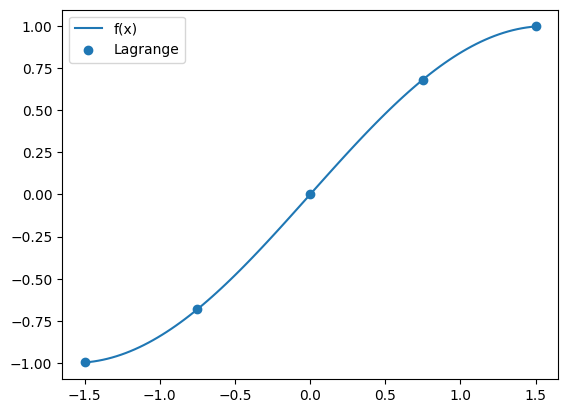

In [14]:
plt.plot(x_muestra, f(x_muestra), label='f(x)')
plt.scatter(x, L(x, x), label='Lagrange')
plt.legend()
plt.show()

## Usando Scipy

La libreria scipy trae una implementación que permite calcular los pesos de cada grado del polinomio. 


Primero cargamos el método lagrange del paquete scipy.interpolate.

In [15]:
from scipy.interpolate import lagrange

Luego usando el método lagrange, le pasamos los puntos a interpolar, y la función evaluada en dichos puntos. Esto retornará los pesos del polinomio en cada grado.

In [16]:
y = f(x)
poly = lagrange(x, y)

In [17]:
poly

poly1d([ 5.55111512e-17, -1.44506680e-01,  2.77555756e-17,  9.90136687e-01,
        0.00000000e+00])

Esto quiere decir que el polinomio resultante tiene la forma.

$L(x) = -0.144x+0.99x^2$

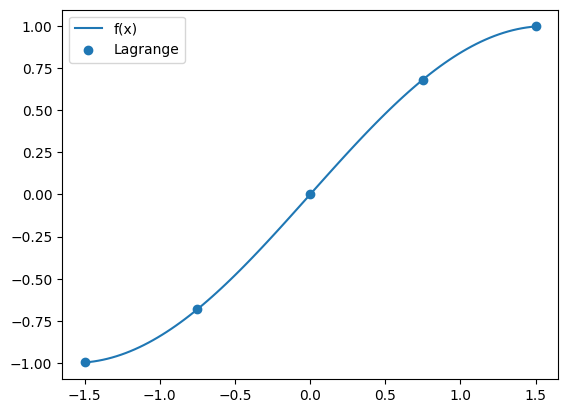

In [18]:
plt.plot(x_muestra, f(x_muestra), label='f(x)')
plt.scatter(x, poly(x), label='Lagrange')
plt.legend()
plt.show()

# Dificultades del método

El método puede fallar principalmente en en dos circunstancias.

Primero, cuando el numero de puntos a interpolar es muy pequeño, pues esto resultaría en un modelo simple que no sea capaz de representar el modelo.
Segundo, una solución al primer problema puede ser incrementar el número de puntos a interpolar, sin emabrgo, esto puede resultar computacionalmente costoso.